# 키워드 추출 
- 긍정, 부정 각 주제들을 통해 주제마다 키워드를 직접 지정해주었다 . 긍정리뷰의 토픽들을 비교하여 공통적인 요소를 제거하고 가장 높게 나오는 단어들을 통해 키워드를 지정해주었다. 즉 긍정 - topic 1 : 친절, 청결, topic 2: 친절 + 수영장 있음, topic 3 : 위치, 시설(화장실, 시설, 침대, 주변, 냄새) 나눈후 할당해주었다.
- 그 다음 임의로 호텔(골든코스트호텔)을 지정해준후 문서의 단어들의 wordcloud와 상응하는 topic을 비교하였다.
- 그 결과  호텔(골든코스트호텔)의 키워드인 친절, 수영장 있음에 대한 내용이 wordcloud에도 등장함을 확인하였다.

In [1]:
import pandas as pd

In [2]:
data=pd.read_excel('merge_pos_neg.xlsx',encoding='cp949')

In [4]:
def pos(x):
    if x ==0:
        return("친절 + 청결")
    elif x==1:
        return('친절 + 수영장 있음')
    else:
        return('위치가 좋음 + 주변시설이 좋음')

In [5]:
data['pos_key']=data['긍정'].apply(pos)

In [6]:
def neg(x):
    if x ==0:
        return("객실 불편 ")
    elif x==1:
        return('조식 맛없음')
    else:
        return('청결하지 못한 시설')

In [7]:
data['neg_key']=data['부정'].apply(neg)

In [8]:
data['key']=data['pos_key']+'+'+data['neg_key']

In [9]:
key_data=data[['호텔이름','key']]

In [10]:
key_data

,호텔이름,key
0,그랜드 머큐어 앰배서더 호텔 앤드 레지던스 서울 용산,친절 + 수영장 있음+객실 불편
1,롯데 호텔 서울,친절 + 수영장 있음+조식 맛없음
2,남대문 호텔앤스위트,친절 + 수영장 있음+조식 맛없음
3,서울신라호텔,친절 + 청결+객실 불편
4,인터컨티넨탈 서울 코엑스,친절 + 청결+객실 불편
...,...,...
271,레드스톤 게스트 하우스,친절 + 수영장 있음+청결하지 못한 시설
272,골드코스트호텔,친절 + 수영장 있음+객실 불편
273,라마다 서울 신도림 호텔,친절 + 수영장 있음+객실 불편
274,킨스 하우스,친절 + 청결+조식 맛없음


In [11]:
data=pd.read_excel('data_label.xlsx',encoding='utf-8')

In [12]:
data_dict=dict()
for i in range(len(data)):
    if data['호텔이름'][i] not in data_dict.keys():
        data_dict[data['호텔이름'][i]]=data['리뷰'][i]
    else:
        data_dict[data['호텔이름'][i]]=data_dict[data['호텔이름'][i]]+' '+ data['리뷰'][i]
a=pd.DataFrame.from_dict([data_dict])
final_data=pd.melt(a,var_name='호텔이름', value_name='리뷰')

In [13]:
#친절 + 수영장 있음+객실 불편
example=final_data.query('호텔이름=="골드코스트호텔"')['리뷰']

In [14]:
from konlpy.tag import Komoran

In [15]:
tagger = Komoran()

In [16]:
def extract_nouns(text):
    nouns = tagger.nouns(text)
    values = [noun for noun in nouns if (len(noun)> 1 and noun!='호텔') or noun == '돈' ]
    return values

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=100, tokenizer=extract_nouns)

In [18]:
tdm = cv.fit_transform(example)

In [19]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

In [20]:
import requests

In [21]:
res = requests.get('https://hangeul.naver.com/webfont/NanumBrush/NanumPen.ttf')
with open('NanumPen.ttf', 'wb') as f:
    f.write(res.content)

In [22]:
from wordcloud import WordCloud

In [23]:
wc = WordCloud(background_color='white',
               width=400, height=300, 
               font_path='NanumPen.ttf')

In [24]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()

In [25]:
cloud = wc.fit_words(count_dic)

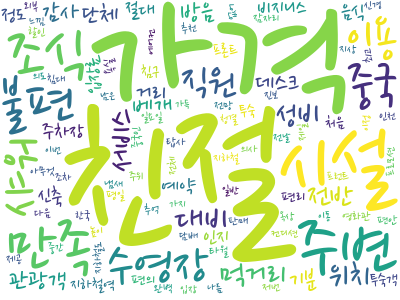

In [26]:
cloud.to_image()